In [22]:
#koroner arter hastalığı: kalbe kan taşıyan damarların daralması
#kalp yetmezliği: kalbin yeterince kan pompalayamaması
#Aritmi: kalbin anormal ritimde atması


In [23]:
#ML ile Kalp Hastalığı Tahmini Erken Müdahale Sağlar.

#import library
#data load and EDA(Explatoary Data Analysis)
#handling missing value
#train test split
#standartization
#Categorical Encoding
#model: KNN, RF, Voting Classifier ile
#train and test

#confusion matrix




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

######## Binary Classification değil MUltiClass Classification yapıcaz Çünkü hedef sütun olan num sütun 0,1,2,3,4, değerlerinden oluşuyor!!!

In [25]:
df=pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [26]:
df=df.drop(columns=["id"])
df.info()
#eksik veri çokça var sütunlarda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [27]:
describe=df.describe()
describe

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<Figure size 1200x800 with 0 Axes>

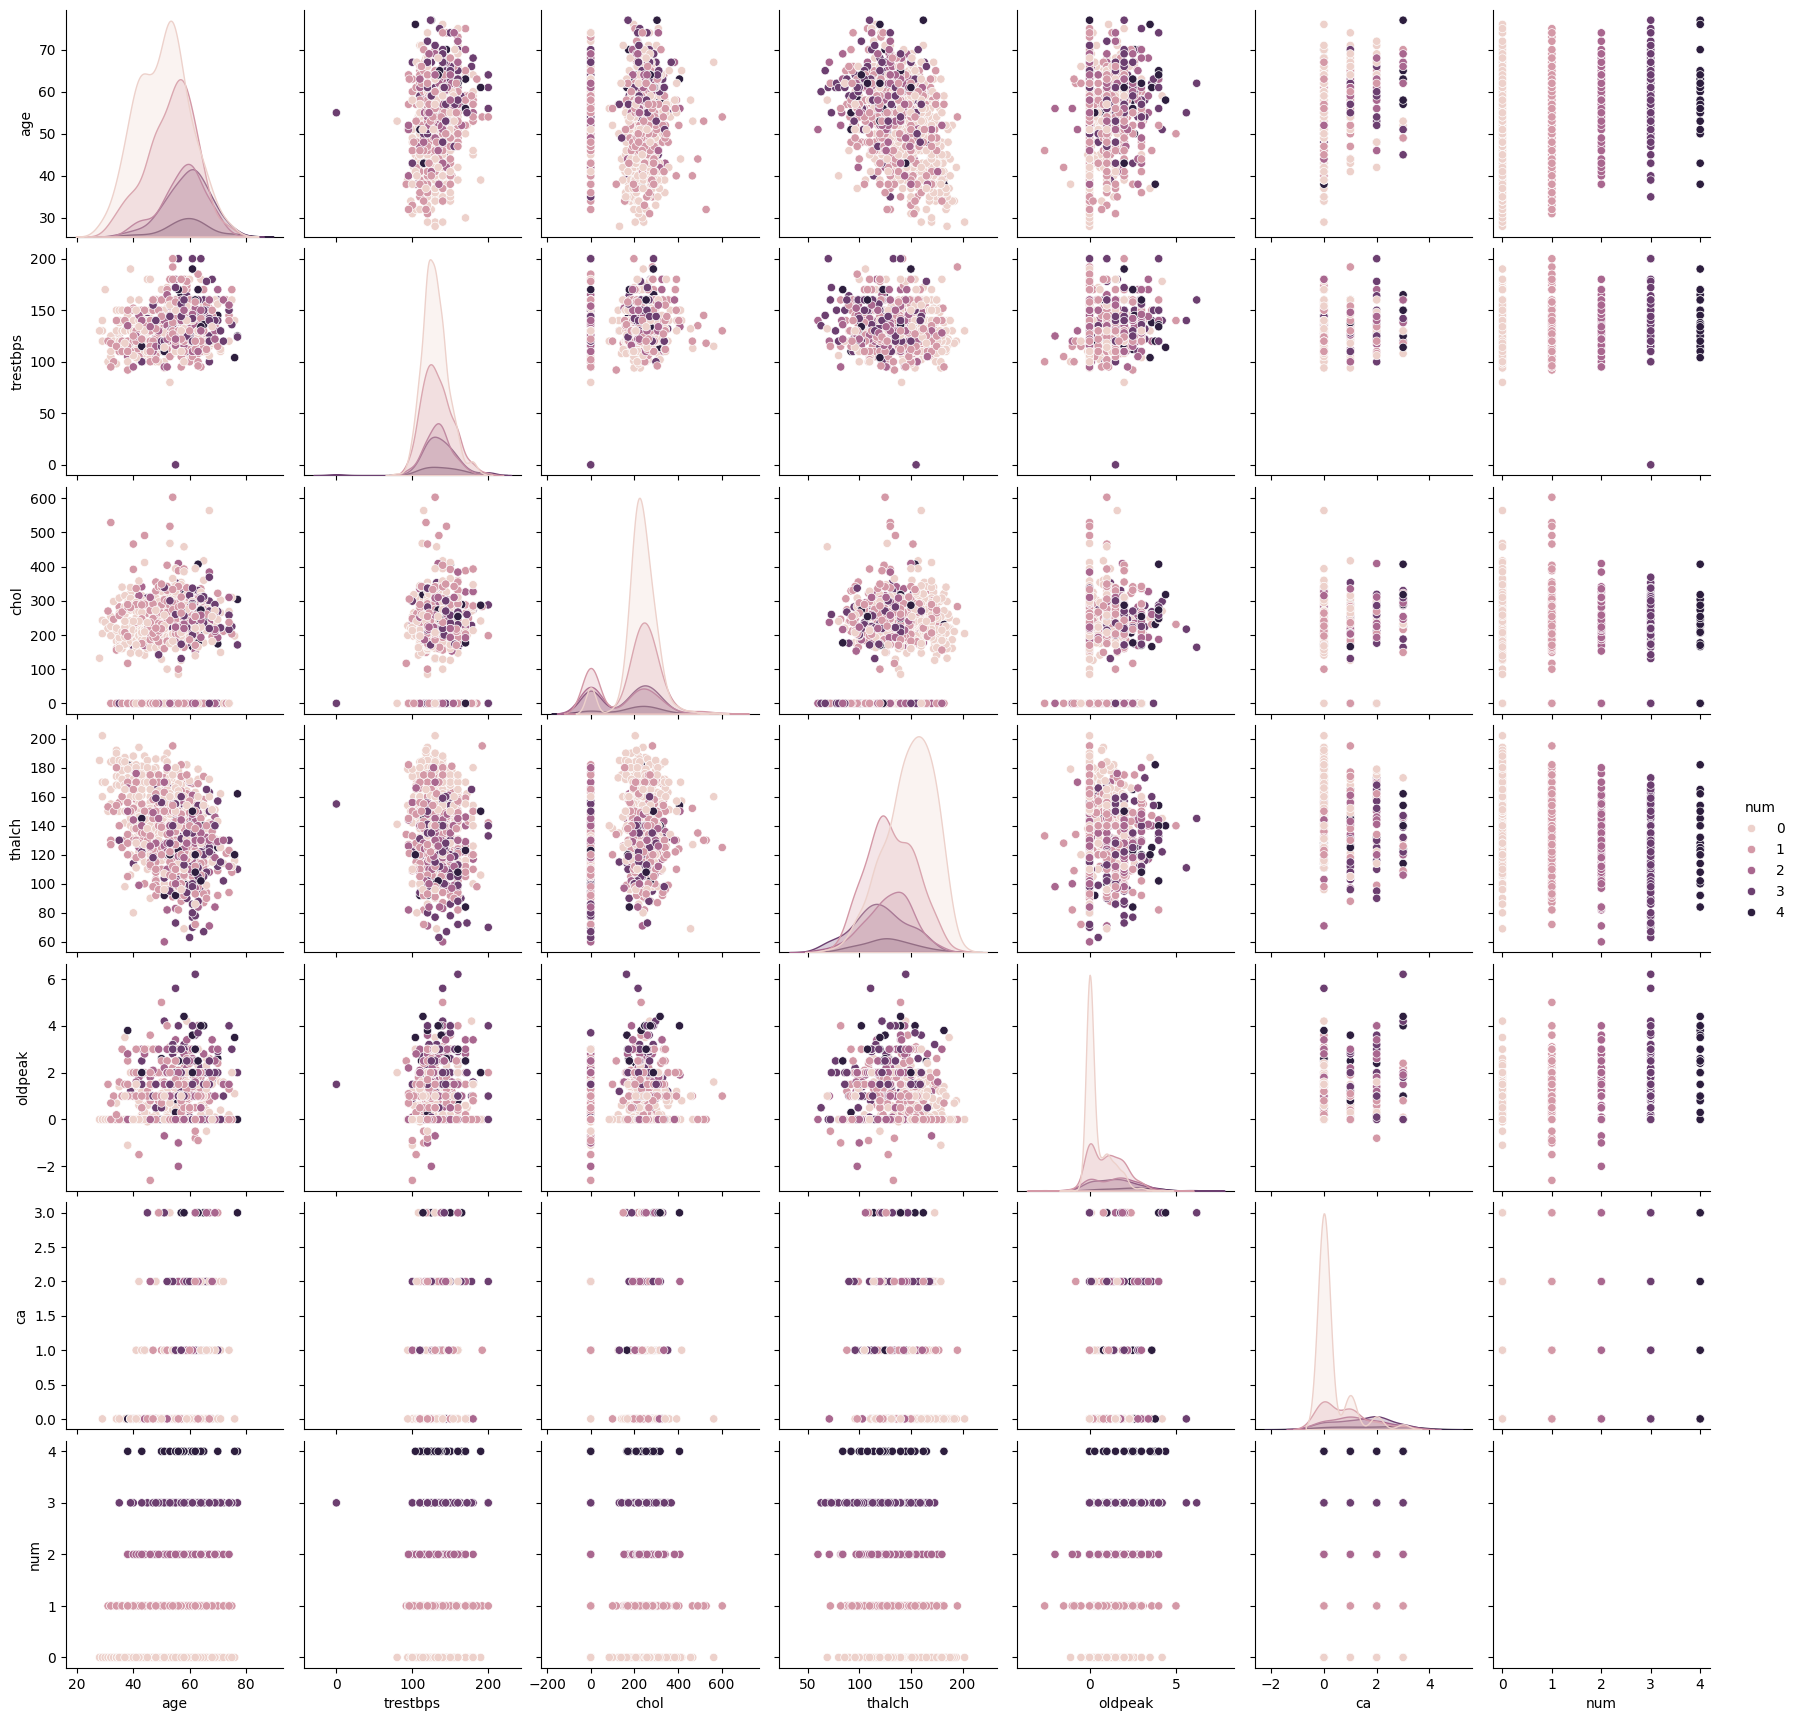

In [28]:
#numerical_features=df.select_dtypes(include=["float64"]) #böyle de yazılbilir
#yada numpy.number dersek tüm nümerik yani sayısal değerleri kapsar
numerical_features=df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features

plt.figure(figsize=(12,8))
sns.pairplot(df, vars=numerical_features,hue="num") #sadece sayısal veri içeren sütünları gösterdim, hue=num yani target değer
plt.show()


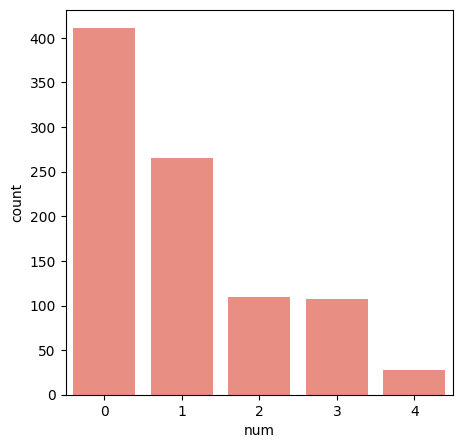

In [29]:
#target sütun dağılım
plt.figure(figsize=(5,5))
sns.countplot(x="num",data=df,color="salmon") #burdaki x=num yani bizim num sütunumuz
plt.show() #şu an veri dengesiz

In [30]:
#missing data
#df.isnull() #true kayıp veri var demek
df.isnull().sum() #sum deyince sütun bazlı topla yapılır


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [31]:
#ca sütunu kategorik değerlerden oluşuyor ve bu sütunda çok sayıda nan değer var o yüzden bu ca sütunu değerleri çıkartıcaz
df=df.drop(columns=["ca"])
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

In [32]:
#missing değerleri doldurma

#trestbps sütunu için medyan değerini alarak doldurucaz
df["trestbps"].fillna(df["trestbps"].median(),inplace=True) #inplace =True diyerek gerçekten bu değişikliği df içine yansıtara kaydet

In [33]:
df.isnull().sum() #trestbps      0 oldu!!! yani doldurduk bu sütündaki nan değerleri

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

In [34]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [35]:
df["chol"].fillna(df["chol"].median(),inplace=True) #bu sütında nümerik değerler olduğu için medyanını alarak nan satırları doldurduk
df["fbs"].fillna(df["fbs"].mode()[0],inplace=True) #ama bu fbs sütunu boolean olduğu için burada doldurma şekli media değil mode yapıcaz. yani true ve false sayısını tespit 
                                                #edicez en çok hangisinden varsa ki bunu bulan fonksiyon mode dur , o fazla olan değere göre doldurucaz

In [36]:
df["fbs"].mode() #df["fbs"].mode()[0] yazdık yukarda çünkü 0. indekste 0 değeri;1.indekste false değeri var mode yapınca

0    False
Name: fbs, dtype: bool

In [37]:
df["restecg"].fillna(df["restecg"].mode()[0],inplace=True)

In [38]:
df["thalch"].fillna(df["thalch"].median(),inplace=True)
df["exang"].fillna(df["exang"].mode()[0],inplace=True)
df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)
df["slope"].fillna(df["slope"].mode()[0],inplace=True)
df["thal"].fillna(df["thal"].mode()[0],inplace=True)

In [39]:
df.isnull().sum() #hiç nan değer kalmadı. #kategorik verileri  mode() ile; nümerik veriler median() ile doldurduldu

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [40]:
#train test split
X=df.drop(["num"],axis=1)
y=df["num"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [41]:
categorical_features=["sex","dataset","cp","restecg","exang","slope","thal"]
numerical_features=["age","trestbps","chol","fbs","thalch","oldpeak"]

#standartlaştırma
X_train_num=X_train[numerical_features]
X_test_num=X_test[numerical_features]

scaler=StandardScaler()
X_train_num_scaled=scaler.fit_transform(X_train_num)
X_test_num_scaled=scaler.transform(X_test_num)



In [42]:
X_train_num_scaled

array([[ 0.90241255, -0.08394637, -0.26257507, -0.40110258, -0.69418678,
         1.9836244 ],
       [ 0.03477619,  0.98777137,  0.22365937, -0.40110258, -0.6149987 ,
        -0.79440597],
       [-0.29058745, -0.08394637,  1.28787059, -0.40110258,  0.09769399,
        -0.33140091],
       ...,
       [ 2.31232163,  1.52363024,  1.02181778,  2.49312781, -1.01093908,
         1.05761428],
       [-0.07367836,  0.4519125 ,  0.15943972, -0.40110258,  0.17688206,
         1.05761428],
       [ 0.36013982, -0.19111814,  0.95759814, -0.40110258,  0.84998071,
        -0.79440597]])

In [43]:
#şimdi kategorik verileri scale edicez yani kategorik kodlama yapıcaz
#onehot encoder ile
encoder=OneHotEncoder(sparse_output=False, drop="first") #sparse_output=False: Çıktıyı seyrek matris değil dense NumPy array olarak döndürür.

X_train_cat=X_train[categorical_features]       
X_test_cat=X_test[categorical_features]

X_train_cat_encoded=encoder.fit_transform(X_train_cat)
X_test_cat_encoded=encoder.transform(X_test_cat)          

X_train_cat_encoded                                   

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [44]:
import numpy as np
X_train_transformed=np.hstack((X_train_num_scaled,X_train_cat_encoded)) 
X_test_transformed=np.hstack((X_test_num_scaled,X_test_cat_encoded)) 


In [49]:
X_train_transformed

array([[ 0.90241255, -0.08394637, -0.26257507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.03477619,  0.98777137,  0.22365937, ...,  0.        ,
         1.        ,  0.        ],
       [-0.29058745, -0.08394637,  1.28787059, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 2.31232163,  1.52363024,  1.02181778, ...,  0.        ,
         0.        ,  1.        ],
       [-0.07367836,  0.4519125 ,  0.15943972, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36013982, -0.19111814,  0.95759814, ...,  1.        ,
         1.        ,  0.        ]])

In [50]:
#model kurma
rf=RandomForestClassifier(n_estimators=100,random_state=42)
knn=KNN()
voting_clf=VotingClassifier(estimators=[
    ("rf",rf),
    ("knn",knn)
],voting="soft") #votingclassifier hangi algoritmanın daha iyi olduğunu oylama yöntemi le karar veriyor.voting parametresi oylamanın nasıl yapılacağını söylüyor
#soft voting de çıkan sonuçların olasılık oratalaması
#hard voting de çoğunluk ortalamasına bakar

In [78]:
#eğitim
voting_clf.fit(X_train_transformed,y_train)

#tahmin
y_pred=voting_clf.predict(X_test_transformed)

print("Accuracy: ",accuracy_score(y_test,y_pred))

labels = [0,1,2,3,4]
print("Confusion Matrix: ")
cm=confusion_matrix(y_test,y_pred,labels=labels)
print(cm)

print("Classification Report: ")
report=classification_report(y_test,y_pred,labels=labels)
print(report)

#Precision (Pozitif Öngörü Değeri, PPV) = TP/(TP+FP)
#“Pozitif dediklerimin kaçı gerçekten pozitif?”

#Recall (Duyarlılık/Sensitivity) = TP/(TP+FN)
#“Gerçek pozitiflerin kaçı yakalandı?” (kaçırma riskinin karşıtı)

#F1-score = 2·(Prec·Rec)/(Prec+Rec)
#Precision ve Recall’un harmonik ortalaması; dengesiz veride daha anlamlı.

#Macro avg: Sınıf başına ortalama (her sınıfa eşit ağırlık).
#Weighted avg: Her sınıfı destek (support) ile ağırlıklar; çoğunluk sınıf baskın gelir.

Accuracy:  0.5760869565217391
Confusion Matrix: 
[[66  6  3  0  0]
 [15 29  6  4  0]
 [ 2 10  7  6  0]
 [ 6 12  3  4  1]
 [ 0  0  1  3  0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        75
           1       0.51      0.54      0.52        54
           2       0.35      0.28      0.31        25
           3       0.24      0.15      0.19        26
           4       0.00      0.00      0.00         4

    accuracy                           0.58       184
   macro avg       0.37      0.37      0.36       184
weighted avg       0.53      0.58      0.55       184



In [79]:
report


'              precision    recall  f1-score   support\n\n           0       0.74      0.88      0.80        75\n           1       0.51      0.54      0.52        54\n           2       0.35      0.28      0.31        25\n           3       0.24      0.15      0.19        26\n           4       0.00      0.00      0.00         4\n\n    accuracy                           0.58       184\n   macro avg       0.37      0.37      0.36       184\nweighted avg       0.53      0.58      0.55       184\n'

In [80]:
report_dict=report=classification_report(y_test,y_pred,output_dict=True)
print("Class 1 (disease) metrics:")
print(f"  precision (PPV): {report_dict['1']['precision']:.3f}") #1 classında ne kadar doğruyum
print(f"  recall (sensitivity): {report_dict['1']['recall']:.3f}") #1 olanların kaçınu yakladım
print(f"  f1-score: {report_dict['1']['f1-score']:.3f}")
print(f"  support: {report_dict['1']['support']}")

Class 1 (disease) metrics:
  precision (PPV): 0.509
  recall (sensitivity): 0.537
  f1-score: 0.523
  support: 54.0


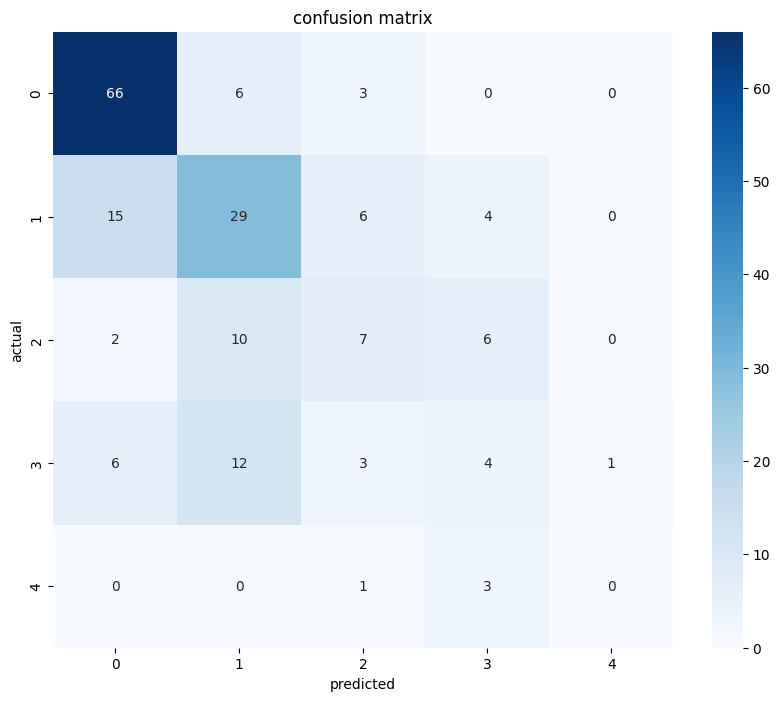

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues") #fmt ="d" decimal tamsayı demek
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# 1) Confusion matrix'i üret (etiket sırasını sabitle)
labels = [0, 1, 2, 3, 4]          # ihtiyacına göre değiştir
cm = confusion_matrix(y_test, y_pred, labels=labels)

# 2) Her sınıf için TP/FN/FP/TN tablosu
def tp_fp_fn_tn_table(cm, labels=None):
    cm = np.asarray(cm)
    n = cm.shape[0]
    if labels is None:
        labels = list(range(n))
    total = cm.sum()

    rows = []
    for k in range(n):
        tp = int(cm[k, k])
        fn = int(cm[k, :].sum() - tp)      # satır k toplamı - TP
        fp = int(cm[:, k].sum() - tp)      # sütun k toplamı - TP
        tn = int(total - tp - fn - fp)     # kalan her şey
        rows.append({
            "class": labels[k],
            "TP": tp, "FN": fn, "FP": fp, "TN": tn,
            "support": tp + fn
        })
    return pd.DataFrame(rows).set_index("class")

table = tp_fp_fn_tn_table(cm, labels)
print(table)


       TP  FN  FP   TN  support
class                          
0      66   9  23   86       75
1      29  25  28  102       54
2       7  18  13  146       25
3       4  22  13  145       26
4       0   4   1  179        4


In [77]:
import numpy as np

k = 0  # sınıf 0

tn = cm[k, k]
fn = cm[k+1,k]
fp = cm[k,k+1]
tp = cm[k+1,k+1]

print(f"0. sınıf için TP={tp}, FP={fp}, FN={fn}, TN={tn}")



0. sınıf için TP=29, FP=6, FN=15, TN=66


In [ ]:
#Multiclass ile Multilable farkı

# Multiclass (tek etiket): Her örnek tek sınıfa aittir. (Seçeneklerden yalnızca biri doğru.)

# Multilabel (çok etiket): Her örnek birden fazla etikete aynı anda sahip olabilir. (Birden fazla seçenek aynı anda doğru olabilir.)

#  örneğin:

# Multiclass: “Hastalık evresi kaç?” → {0,1,2,3,4}’ten biri.

# Multilabel: “Bu hastada hangi hastalıklar var?” → {Hipertansiyon, Diyabet, KOAH, …} → ikisi/üçü birden olabilir.

# veri temsili

# Multiclass y: tek sayı / kategori
# Örn: y = 3

# Multilabel y: çoklu 0/1 vektör (multi-hot)
# Örn: y = [1, 0, 1, 0] (1. ve 3. etiket var)